In [1]:
#import sys
#!{sys.executable} -m pip install pandas_datareader
import pandas as pd
import numpy as np
from pandas_datareader import data, wb
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_colwidth', 200)

C:\Users\VincentZhou\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


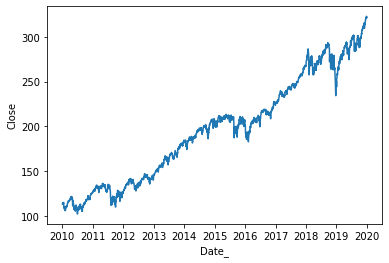

In [2]:
start_date = pd.to_datetime('2010-01-01')
stop_date = pd.to_datetime('2020-01-01')

sp500 = pdr.data.get_data_yahoo('SPY',start_date,stop_date)
sp500['Date_'] = sp500.index
sp500_close = sp500['Close']

#fig,ax = plt.subplots(figsize=(15,10))
#sp500_close.plot(color = 'k')
#plt.title('SP500',fontsize = 50)

ax = sns.lineplot(x="Date_", y="Close",data=sp500)
plt.show()

In [3]:
first_open = sp500.Open[0]
last_open = sp500.Open[-1]
price_change_10 = last_open-first_open
price_change_10

208.15999603271484

In [4]:
#假设每天开盘买入，收盘卖出
sp500['Daily_Change'] = pd.Series(sp500['Close']-sp500['Open'])
sp500['Daily_Change'].sum()


73.32952880859375

In [6]:
#计算交易标准差
print("交易标准差:",np.std(sp500['Daily_Change']))

#计算隔夜标准差
sp500['Overnight_Change'] = pd.Series(sp500['Open']-sp500['Close'].shift(1))
print("隔夜标准差:",np.std(sp500['Overnight_Change']))

#隔夜交易于盘中交易相比具有更低的波动性

交易标准差: 1.3833703685334464
隔夜标准差: 1.034699072122955


In [7]:
print("盘中下跌交易平均变化：",sp500[sp500['Daily_Change']<0]\
      ['Daily_Change'].mean())
print("隔夜下跌交易平均变化：",sp500[sp500['Overnight_Change']<0]\
      ['Overnight_Change'].mean())
#隔夜交易策略平均下跌小于盘中交易

盘中下跌交易平均变化： -1.006608001736015
隔夜下跌交易平均变化： -0.7307366047057835


In [8]:
print("盘中上涨交易平均变化：",sp500[sp500['Daily_Change']>0]\
      ['Daily_Change'].mean())
print("隔夜上涨交易平均变化：",sp500[sp500['Overnight_Change']>0]\
      ['Overnight_Change'].mean())
#隔夜交易策略平均上涨也小于盘中交易，偏保守

盘中上涨交易平均变化： 0.8843493879887095
隔夜上涨交易平均变化： 0.7077438106930714


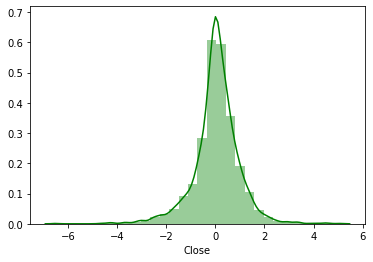

In [56]:
# 每日回报
daily_rtn = pd.DataFrame(((sp500['Close'] - sp500['Close'].\
                               shift(1))/sp500['Close'].shift(1))*100)
ax = sns.distplot(daily_rtn['Close'],bins=30, color='g')

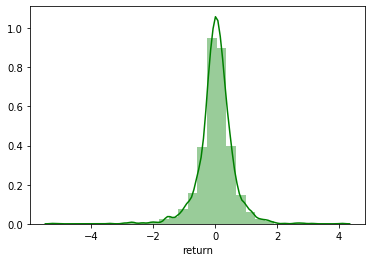

In [54]:
# 隔夜回报
overnight_rtn = pd.DataFrame(((sp500['Open'] - sp500['Close'].\
                               shift(1))/sp500['Close'].shift(1))*100,columns=['return'])
ax = sns.distplot(overnight_rtn['return'],bins=30, color='g')

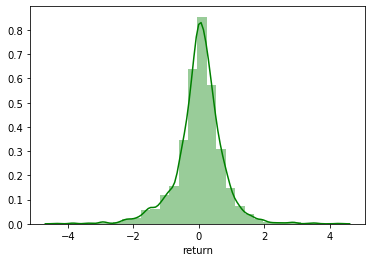

In [11]:
# 日中回报
intraday_rtn = pd.DataFrame(((sp500['Close'] - sp500['Open'])/sp500['Open'].\
                              shift(1))*100,columns=['return'])
ax = sns.distplot(intraday_rtn['return'],bins=30, color='g')

In [12]:
#获得分布统计型数据
def get_stats(s, n=252):
    s = s.dropna()
    wins = len(s[s>0])
    losses = len(s[s<0])
    evens = len(s[s==0])
    mean_w = round(s[s>0].mean(), 3)
    mean_l = round(s[s<0].mean(), 3)
    win_r = round(wins/losses, 3)
    mean_trd = round(s.mean(), 3)
    sd = round(np.std(s), 3)
    max_l = round(s.min(), 3)
    max_w = round(s.max(), 3)
    sharpe_r = round((s.mean()/np.std(s))*np.sqrt(n), 4)
    cnt = len(s)
    print('Trades:', cnt,\
          '\nWins:', wins,\
          '\nLosses:', losses,\
          '\nBreakeven:', evens,\
          '\nWin/Loss Ratio', win_r,\
          '\nMean Win:', mean_w,\
          '\nMean Loss:', mean_l,\
          '\nMean', mean_trd,\
          '\nStd Dev:', sd,\
          '\nMax Loss:', max_l,\
          '\nMax Win:', max_w,\
          '\nSharpe Ratio:', sharpe_r)

In [13]:
daily_rtn = ((sp500['Close'] - sp500['Close'].\
                               shift(1))/sp500['Close'].shift(1))*100
overnight_rtn =((sp500['Open'] - sp500['Close'].\
                               shift(1))/sp500['Close'].shift(1))*100
intraday_rtn = ((sp500['Close'] - sp500['Open'])/sp500['Open'].\
                shift(1))*100
stra_list = [daily_rtn,overnight_rtn,intraday_rtn]
for m in stra_list:
    get_stats(m)
    print("---------------")

Trades: 2515 
Wins: 1382 
Losses: 1123 
Breakeven: 10 
Win/Loss Ratio 1.231 
Mean Win: 0.625 
Mean Loss: -0.666 
Mean 0.046 
Std Dev: 0.929 
Max Loss: -6.512 
Max Win: 5.052 
Sharpe Ratio: 0.7834
---------------
Trades: 2515 
Wins: 1356 
Losses: 1127 
Breakeven: 32 
Win/Loss Ratio 1.203 
Mean Win: 0.379 
Mean Loss: -0.397 
Mean 0.026 
Std Dev: 0.564 
Max Loss: -5.227 
Max Win: 4.09 
Sharpe Ratio: 0.7334
---------------
Trades: 2515 
Wins: 1367 
Losses: 1129 
Breakeven: 19 
Win/Loss Ratio 1.211 
Mean Win: 0.476 
Mean Loss: -0.533 
Mean 0.019 
Std Dev: 0.716 
Max Loss: -4.352 
Max Win: 4.271 
Sharpe Ratio: 0.432
---------------


In [14]:
#使用支持向量回归构建模型
#首先构建数据，加入每日前20天的收盘价作为新列

for i in range(1,21,1):
    sp500.loc[:,'Close Minus' + str(i)] = sp500['Close'].shift(i)

sp500

,High,Low,Open,Close,Volume,Adj Close,Date_,Daily_Change,Overnight_Change,Close Minus1,...,Close Minus11,Close Minus12,Close Minus13,Close Minus14,Close Minus15,Close Minus16,Close Minus17,Close Minus18,Close Minus19,Close Minus20
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,113.389999,111.510002,112.370003,113.330002,118944600.0,92.246048,2010-01-04,0.959999,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,113.680000,112.849998,113.260002,113.629997,111579900.0,92.490204,2010-01-05,0.369995,-0.070000,113.330002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,113.989998,113.430000,113.519997,113.709999,116074400.0,92.555328,2010-01-06,0.190002,-0.110001,113.629997,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,114.330002,113.180000,113.500000,114.190002,131091100.0,92.946060,2010-01-07,0.690002,-0.209999,113.709999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,114.620003,113.660004,113.889999,114.570000,126402800.0,93.255348,2010-01-08,0.680000,-0.300003,114.190002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,321.519989,320.899994,321.470001,321.230011,20270000.0,319.352142,2019-12-24,-0.239990,0.250000,321.220001,...,313.880005,314.869995,312.019989,311.459991,309.549988,311.640015,314.309998,315.480011,314.079987,313.369995
2019-12-26,322.950012,321.640015,321.649994,322.940002,30911200.0,321.052124,2019-12-26,1.290009,0.419983,321.230011,...,313.529999,313.880005,314.869995,312.019989,311.459991,309.549988,311.640015,314.309998,315.480011,314.079987
2019-12-27,323.799988,322.279999,323.739990,322.859985,42528800.0,320.972565,2019-12-27,-0.880005,0.799988,322.940002,...,314.420013,313.529999,313.880005,314.869995,312.019989,311.459991,309.549988,311.640015,314.309998,315.480011


In [15]:
sp500_20 = sp500[[x for x in sp500.columns if 'Close Minus' in x or \
                 x == 'Close']].iloc[20:,::-1]
sp500_20

,Close Minus20,Close Minus19,Close Minus18,Close Minus17,Close Minus16,Close Minus15,Close Minus14,Close Minus13,Close Minus12,Close Minus11,...,Close Minus9,Close Minus8,Close Minus7,Close Minus6,Close Minus5,Close Minus4,Close Minus3,Close Minus2,Close Minus1,Close
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-02,113.330002,113.629997,113.709999,114.190002,114.570000,114.730003,113.660004,114.620003,114.930000,113.639999,...,113.889999,111.699997,109.209999,109.769997,109.309998,109.830002,108.570000,107.389999,109.059998,110.379997
2010-02-03,113.629997,113.709999,114.190002,114.570000,114.730003,113.660004,114.620003,114.930000,113.639999,115.059998,...,111.699997,109.209999,109.769997,109.309998,109.830002,108.570000,107.389999,109.059998,110.379997,109.830002
2010-02-04,113.709999,114.190002,114.570000,114.730003,113.660004,114.620003,114.930000,113.639999,115.059998,113.889999,...,109.209999,109.769997,109.309998,109.830002,108.570000,107.389999,109.059998,110.379997,109.830002,106.440002
2010-02-05,114.190002,114.570000,114.730003,113.660004,114.620003,114.930000,113.639999,115.059998,113.889999,111.699997,...,109.769997,109.309998,109.830002,108.570000,107.389999,109.059998,110.379997,109.830002,106.440002,106.660004
2010-02-08,114.570000,114.730003,113.660004,114.620003,114.930000,113.639999,115.059998,113.889999,111.699997,109.209999,...,109.309998,109.830002,108.570000,107.389999,109.059998,110.379997,109.830002,106.440002,106.660004,105.889999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,313.369995,314.079987,315.480011,314.309998,311.640015,309.549988,311.459991,312.019989,314.869995,313.880005,...,314.420013,317.130005,317.320007,319.500000,319.570007,319.589996,320.899994,320.730011,321.220001,321.230011
2019-12-26,314.079987,315.480011,314.309998,311.640015,309.549988,311.459991,312.019989,314.869995,313.880005,313.529999,...,317.130005,317.320007,319.500000,319.570007,319.589996,320.899994,320.730011,321.220001,321.230011,322.940002
2019-12-27,315.480011,314.309998,311.640015,309.549988,311.459991,312.019989,314.869995,313.880005,313.529999,314.420013,...,317.320007,319.500000,319.570007,319.589996,320.899994,320.730011,321.220001,321.230011,322.940002,322.859985


In [16]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

clf = SVR(kernel='linear')

x_train = sp500_20[:-1500]
y_train = sp500_20['Close'].shift(-1)[:-1500]

x_test = sp500_20[-1500:-1000]
y_test = sp500_20['Close'].shift(-1)[-1500:-1000]

In [40]:
model = clf.fit(x_train,y_train)
preds = model.predict(x_test)
tf = pd.DataFrame(list(zip(y_test, preds)), columns=['Next Day Close', 'Predicted Next Close'], index=y_test.index)

cdc = sp500[['Close']].iloc[-1500:-1000]
ndo = sp500[['Open']].iloc[-1500:-1000].shift(-1)

tf1 = pd.merge(tf, cdc, left_index=True, right_index=True)
tf2 = pd.merge(tf1, ndo, left_index=True, right_index=True)
tf2.columns = ['Next Day Close', 'Predicted Next Close', 'Current Day Close', 'Next Day Open']

tf2.head()

,Next Day Close,Predicted Next Close,Current Day Close,Next Day Open
Date,,,,
2014-01-16,183.639999,184.710885,184.419998,184.100006
2014-01-17,184.179993,183.878082,183.639999,184.699997
2014-01-21,184.300003,183.861252,184.179993,184.490005
2014-01-22,182.789993,184.423894,184.300003,183.369995
2014-01-23,178.889999,182.992257,182.789993,181.600006


In [43]:
#设置信号，如果下一天的预测收盘价大于开盘时的价格，则我们输出1，进行
#开盘买入和收盘卖出

def get_signal(r):
    if r['Predicted Next Close'] > r['Next Day Open'] + 1:
        return 1
    else:
        return 0

#如果给出买卖信号，则计算每日收益率
def get_ret(r):
    if r['Signal'] == 1:
        return ((r['Next Day Close'] - r['Next Day Open'])/r['Next Day Open']) * 100
    else:
        return 0

#Assign函数可以调用添加列
tf2 = tf2.assign(Signal = tf2.apply(get_signal, axis=1))
tf2 = tf2.assign(PnL = tf2.apply(get_ret, axis=1))
tf2.head()

,Next Day Close,Predicted Next Close,Current Day Close,Next Day Open,Signal,PnL
Date,,,,,,
2014-01-16,183.639999,184.710885,184.419998,184.100006,0,0.000000
2014-01-17,184.179993,183.878082,183.639999,184.699997,0,0.000000
2014-01-21,184.300003,183.861252,184.179993,184.490005,0,0.000000
2014-01-22,182.789993,184.423894,184.300003,183.369995,1,-0.316301
2014-01-23,178.889999,182.992257,182.789993,181.600006,1,-1.492294


In [60]:
print('策略收益点数：',(tf2[tf2['Signal']==1]['Next Day Close'] - tf2[tf2['Signal']==1]['Next Day Open']).sum())
print('原策略收益点数：',(sp500['Close'].iloc[-1500:-1000] - sp500['Open'].iloc[-1500:-1000]).sum())

#结果不尽人意，出现类似逆向指标的情况，故对策略进行翻转

策略收益点数： -15.880096435546875
策略收益点数： 0.6601104736328125


##### 结果不尽人意，出现类似逆向指标的情况，故对策略进行翻转

In [98]:
def get_signal(r):
    if r['Predicted Next Close'] > r['Next Day Open'] + 1:
        return 0
    else:
        return 1

#如果给出买卖信号，则计算每日收益率
def get_ret(r):
    if r['Signal'] == 1:
        return ((r['Next Day Close'] - r['Next Day Open'])/r['Next Day Open']) * 100
    else:
        return 0

#Assign函数可以调用添加列
tf2 = tf2.assign(Signal = tf2.apply(get_signal, axis=1))
tf2 = tf2.assign(PnL = tf2.apply(get_ret, axis=1))
tf2.head()

print('策略收益点数：',(tf2[tf2['Signal']==1]['Next Day Close'] - tf2[tf2['Signal']==1]['Next Day Open']).sum())
print('原策略收益点数：',(sp500['Close'].iloc[-1500:-1000] - sp500['Open'].iloc[-1500:-1000]).sum())
get_stats(tf2['PnL'])
#获得逆向指标策略，在市场表现出即将出现收益时，我们进行反向操作

策略收益点数： 16.40020751953125
原策略收益点数： 0.6601104736328125
Trades: 499 
Wins: 231 
Losses: 196 
Breakeven: 72 
Win/Loss Ratio 1.179 
Mean Win: 0.449 
Mean Loss: -0.486 
Mean 0.017 
Std Dev: 0.6 
Max Loss: -4.175 
Max Win: 1.95 
Sharpe Ratio: 0.454


## 建模与动态时间规整

In [63]:
#前面我们将交易时间限制在了一天之内，但是这太过于死板，尝试进行动态时间的规整
#fastdtw时用于时间序列挖掘的库，DTW采用动态规划来计算两个时间序列之间的相似性，算法复杂度为O(N2)。
#!pip install fastdtw

from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

#定义函数，计算两个序列直接的距离
def dtw_dist(x,y):
    distance, path = fastdtw(x,y,dist = euclidean)
    return distance

#将先前的历史价格序列分成不同的期间，每个期间长度为5，创建新的x，y数据


#按每五天计算周的每日收益（pct_change()函数用以计算当前项和前一项的百分比变化
#pctc包括了四个每日变化百分比，res包含最后一天和下一数组中第一天的百分比
tseries = []
tlen = 5
for i in range(tlen,len(sp500),tlen):
    pctc = sp500['Close'].iloc[i-tlen:i].pct_change()[1:].values *100
    res = sp500['Close'].iloc[i-tlen:i+1].pct_change()[-1] * 100
    tseries.append((pctc, res))
tseries[0]

(array([0.26470962, 0.07040556, 0.42212942, 0.33277629]), 0.1396558108890389)

In [68]:
#获得序列后，计算每个序列相对于其他序列的距离度量

dist_pairs = []
for i in range(len(tseries)):
    for j in range(len(tseries)):
        dist = dtw_dist(tseries[i][0], tseries[j][0])
        dist_pairs.append((i,j,dist,tseries[i][1], tseries[j][1]))
        


,A,B,Dist,A Ret,B Ret
37,0,38,0.841529,0.139656,0.308616
48,0,49,0.978539,0.139656,-0.158829
52,0,53,0.441191,0.139656,-1.746291
55,0,56,0.652839,0.139656,0.208565
106,0,107,0.546607,0.139656,0.219562
...,...,...,...,...,...
249491,496,500,0.916854,0.723638,0.687001
249492,496,501,0.890751,0.723638,0.152773
249994,497,501,0.906451,0.222388,0.152773
251500,500,501,0.942102,0.687001,0.152773


In [95]:
dist_frame = pd.DataFrame(dist_pairs, columns=['A','B','Dist', 'A Ret', 'B Ret'])
#选出距离不为零的序列，并且要求组合A一定发生于B之前
sf = dist_frame[dist_frame['Dist']>0].sort_values(['A','B']).reset_index(drop=1)
sfe = sf[sf['A']<sf['B']]
#选出距离小于1且第一段序列收益回报大于零的组合
winf = sfe[(sfe['Dist']<=0.7)&(sfe['A Ret']>0)]
winf

,A,B,Dist,A Ret,B Ret
52,0,53,0.441191,0.139656,-1.746291
55,0,56,0.652839,0.139656,0.208565
106,0,107,0.546607,0.139656,0.219562
146,0,147,0.597771,0.139656,0.680846
232,0,233,0.605419,0.139656,-0.039935
...,...,...,...,...,...
234929,467,496,0.437308,0.899168,0.723638
234934,467,501,0.646712,0.899168,0.152773
235431,468,496,0.550816,0.051041,0.723638
235436,468,501,0.577226,0.051041,0.152773


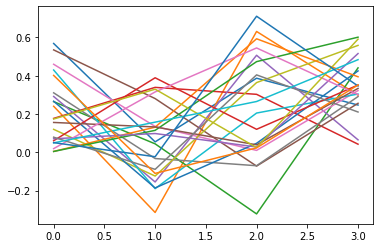

In [96]:
for num in winf[winf['A']==0]['B']:
    plt.plot(tseries[num][0])


In [97]:
#寻找通常条件下能够在res中盈利的曲线模式，对所有类似的曲线首先尝试第一次购买
#随后进行筛选，如果出现亏损则停止并将其加入到excluded中，不再进行投资

excluded = {}
return_list = []

def get_returns(r):
    if excluded.get(r['A']) is None:
        return_list.append(r['B Ret'])
        if r['B Ret'] < 0:
            excluded.update({r['A']:1})
            
winf.apply(get_returns,axis = 1)

get_stats(pd.Series(return_list))

Trades: 265 
Wins: 161 
Losses: 104 
Breakeven: 0 
Win/Loss Ratio 1.548 
Mean Win: 0.502 
Mean Loss: -0.546 
Mean 0.091 
Std Dev: 0.74 
Max Loss: -3.591 
Max Win: 2.127 
Sharpe Ratio: 1.9456


夏普比率出现大幅度优化，说明通过相似度挑选购买时机能够提升测类收益。